In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
# train=pd.DataFrame(pd.read_csv('emnist-balanced-train.csv'))
# test =pd.DataFrame(pd.read_csv('emnist-balanced-test.csv'))

In [3]:
train=pd.read_csv('emnist-balanced-train.csv')
test = pd.read_csv('emnist-balanced-test.csv')

In [4]:
train_X=train.iloc[0:,1:785]
train_Y=train.iloc[0:,0:1]
test_X=test.iloc[0:,1:785]
test_Y=test.iloc[0:,0:1]

In [5]:
test_Y.describe()

,41
count,18799.000000
mean,22.999043
std,13.564746
min,0.000000
25%,11.000000
50%,23.000000
75%,35.000000
max,46.000000


In [6]:
# train_X.shape
train_Y.shape

(112799, 1)

In [7]:
# train_Y['45'].head()
train_X['0.2'].head()

0    0
1    0
2    0
3    0
4    0
Name: 0.2, dtype: int64

In [8]:
train_Y.keys()

Index(['45'], dtype='object')

In [9]:
train_X=np.reshape(np.array(train_X),(len(train_X),28,28,1))
train_Y=np.reshape(np.array(train_Y['45']),(len(train_Y)))
test_X=np.reshape(np.array(test_X),(len(test_X),28,28,1))
test_Y=np.reshape(np.array(test_Y['41']),(len(test_Y)))

In [10]:
train_Y[0]

36

In [11]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_Y,val_Y=train_test_split(train_X,train_Y,test_size=0.2,random_state=7,stratify=train_Y)

In [12]:
len(np.unique(train_Y))

47

In [13]:
len(np.unique(val_Y))

47

In [14]:
print(np.unique(val_Y),np.unique(train_Y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


In [15]:
# train_X,train_Y=train['image'],train['label']
# test_X,test_Y=test['image'],test['label']
# train_X=pd.DataFrame(train_X)
# train_Y=pd.DataFrame(train_Y)
# test_X = pd.DataFrame(test_X)
# test_Y=pd.DataFrame(test_Y)


In [16]:
train_Y[0]

5

In [17]:
# imgData=np.array(train['image'])

In [18]:
# train=tf.cast(train, 'float32')

In [19]:
# # import PIL
# # import scikit_image as si
# # import cv2
# from skimage import data, io, filters
# # PIL.Image.fromarray(imgData[0])
# # img=cv2.imread(imgData[0],0)
# # cv2.imshow(img)
# for i in range(0,12):
#     img=filters.sobel(imgData[i])
#     x=train['label'][i]
#     if x>9 and x<36:
#         print(chr(x-9+64))
#     elif x>=36:
#         print(chr(x-36+97))
#     else:
#         print(x)
#     io.imshow(img)
#     io.show()

In [20]:
# imgData[0].shape

In [21]:
# for i in range(len(rr)):
#     x=train['label'][i]
#     if x>9 and x<36:
#         rr[i]=chr(x-9+64)
#     elif x>=36:
#         rr[i]=chr(x-36+97)
#     else:
#         rr[i]=chr(x+'0')

In [22]:
# def change(x):
#      if x>9 and x<36:
#         return chr(x-9+64)
#      elif x>=36:
#         return chr(x-36+97)
#      else:
#         return chr(x+48)
# rr=tf.convert_to_tensor([i for i in x],dtype=tf.dtypes.string)

In [23]:
# rr[0]

In [24]:
# Y_train[2]

In [25]:
train_Y = tf.keras.utils.to_categorical(train_Y,47)
test_Y = tf.keras.utils.to_categorical(test_Y,47)
val_Y= tf.keras.utils.to_categorical(val_Y,47)

In [48]:
train_X=train_X/255
test_X=test_X/255
val_X=val_X/255

In [26]:
train_Y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dropout,MaxPooling2D,Dense,Flatten,InputLayer


In [28]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=32, padding='same', activation='relu', kernel_size= (3,3)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, padding='same', activation='relu',kernel_size= (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47,activation='softmax'))
model.compile(optimizer='adam',accuracy='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_X, train_Y,
          batch_size=400,
          epochs=11,
          verbose=1,
          validation_data=(val_X, val_Y))

Epoch 1/11
226/226 [==============================] - 136s 595ms/step - loss: 3.1292 - accuracy: 0.4618 - val_loss: 0.6963 - val_accuracy: 0.7883
Epoch 2/11
226/226 [==============================] - 134s 591ms/step - loss: 0.8673 - accuracy: 0.7289 - val_loss: 0.5398 - val_accuracy: 0.8219
Epoch 3/11
226/226 [==============================] - 133s 587ms/step - loss: 0.6967 - accuracy: 0.7745 - val_loss: 0.4814 - val_accuracy: 0.8426
Epoch 4/11
226/226 [==============================] - 132s 585ms/step - loss: 0.6125 - accuracy: 0.7959 - val_loss: 0.4496 - val_accuracy: 0.8503
Epoch 5/11
226/226 [==============================] - 130s 577ms/step - loss: 0.5569 - accuracy: 0.8118 - val_loss: 0.4299 - val_accuracy: 0.8562
Epoch 6/11
226/226 [==============================] - 130s 573ms/step - loss: 0.5107 - accuracy: 0.8254 - val_loss: 0.4198 - val_accuracy: 0.8590
Epoch 7/11
226/226 [==============================] - 128s 568ms/step - loss: 0.4821 - accuracy: 0.8323 - val_loss: 0.4170 -

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

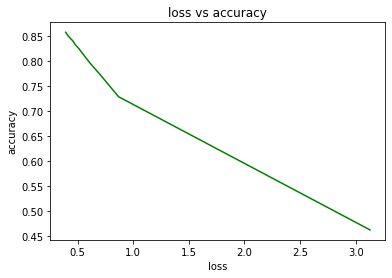

In [30]:
import matplotlib.pyplot as plt
accuracy=history.history['accuracy']
accuracy=history.history['accuracy']
plt.title('accuracy vs accuracy')
plt.plot(accuracy,accuracy,'g')
plt.xlabel('accuracy')
plt.ylabel('accuracy')
plt.show()

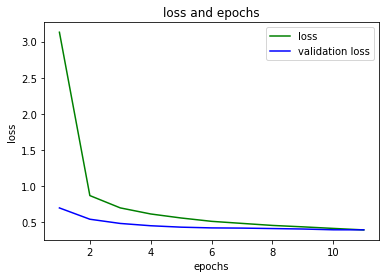

In [31]:
accuracy=history.history['accuracy']
accuracy_val=history.history['val_accuracy']
e=np.arange(1,12)
plt.title('accuracy and epochs')
plt.plot(e,accuracy,'g',label='accuracy')
plt.plot(e,accuracy_val,'b',label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

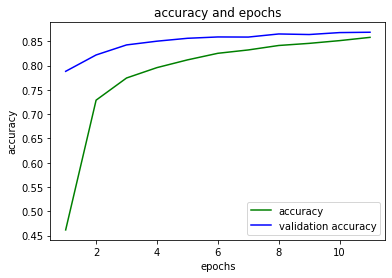

In [44]:
accuracy=history.history['accuracy']
accuracy_val=history.history['val_accuracy']
e=np.arange(1,12)
plt.title('accuracy and epochs')
plt.plot(e,accuracy,'g',label='accuracy')
plt.plot(e,accuracy_val,'b',label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

C:\python3.9\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


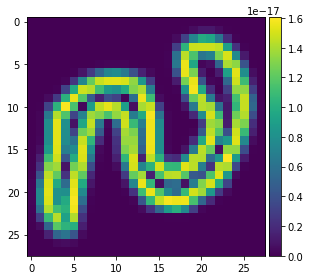

In [34]:
from skimage import filters,io
img=filters.sobel(train_X[0])
io.imshow(img)

In [36]:
result=model.evaluate(test_X,test_Y,verbose=True)

588/588 [==============================] - 5s 9ms/step - loss: 0.4147 - accuracy: 0.8635


In [43]:
result[1]

0.8634501695632935

In [35]:
result[0]

array([2.7857696e-09, 1.9735404e-11, 2.0214632e-11, 3.6848795e-11,
       3.5344605e-14, 4.1623610e-12, 1.3401392e-13, 2.0456191e-15,
       4.4953718e-11, 1.3776482e-11, 1.7075666e-14, 5.1451639e-09,
       3.4072308e-04, 7.5916454e-15, 1.4847086e-05, 1.6724091e-08,
       8.3666354e-09, 3.4030872e-17, 1.6616190e-10, 1.1479474e-16,
       5.5225030e-13, 2.0926636e-08, 1.5090036e-19, 2.0229043e-16,
       1.1096027e-08, 3.7904866e-09, 1.6815653e-13, 1.1252952e-09,
       5.2478065e-12, 1.0479578e-14, 9.1494117e-16, 4.3027281e-16,
       2.4046937e-19, 2.2472621e-17, 1.8311655e-14, 6.0213147e-11,
       1.5887641e-10, 2.5052161e-12, 2.5557513e-13, 9.9964368e-01,
       3.0121139e-08, 7.9821758e-09, 1.4198956e-17, 3.8512341e-17,
       9.2956768e-08, 6.8240176e-08, 5.9215057e-07], dtype=float32)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)